In [48]:
import snscrape.modules.twitter as sntw
import pandas as pd

In [49]:
query = "(from:BarackObama) until:2020-01-01 since:2006-01-01"
tweets = []
limit = 10000

In [50]:
for tweet in sntw.TwitterSearchScraper(query).get_items():
    #print(vars(tweet))
    #break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date,tweet.user.username,tweet.content,tweet.retweetedTweet])
df = pd.DataFrame(tweets, columns = ['Date', 'User','Tweet','retweet'])
df.head()

,Date,User,Tweet,retweet
0,2019-12-30 17:02:44+00:00,BarackObama,"From hip-hop to country to The Boss, here are ...",None
1,2019-12-30 00:33:16+00:00,BarackObama,If there’s one thing I love about @RepJohnLewi...,None
2,2019-12-29 17:03:13+00:00,BarackObama,Next up are my favorite movies and TV shows of...,None
3,2019-12-28 21:16:40+00:00,BarackObama,"As we wind down 2019, I wanted to share with y...",None
4,2019-12-25 00:00:22+00:00,BarackObama,"From the Obama family to yours, Merry Christma...",None


In [51]:
df.head(25)

,Date,User,Tweet,retweet
0,2019-12-30 17:02:44+00:00,BarackObama,"From hip-hop to country to The Boss, here are ...",None
1,2019-12-30 00:33:16+00:00,BarackObama,If there’s one thing I love about @RepJohnLewi...,None
2,2019-12-29 17:03:13+00:00,BarackObama,Next up are my favorite movies and TV shows of...,None
3,2019-12-28 21:16:40+00:00,BarackObama,"As we wind down 2019, I wanted to share with y...",None
4,2019-12-25 00:00:22+00:00,BarackObama,"From the Obama family to yours, Merry Christma...",None
5,2019-12-23 20:50:19+00:00,BarackObama,"On behalf of my family, Chag Sameach and Happy...",None
6,2019-12-19 19:54:31+00:00,BarackObama,2019 was full of moments that show humanity at...,None
7,2019-12-14 16:01:19+00:00,BarackObama,"You can get the zen garden next week, but tomo...",None
8,2019-12-13 18:12:17+00:00,BarackObama,It was remarkable to be back in the Asia-Pacif...,None
9,2019-12-13 03:29:19+00:00,BarackObama,My sister Maya and I are about to take the sta...,None


In [52]:
df.to_csv("Tweets_obama")
df.to_csv("Tweets_obama.csv",sep=",",index = False)

In [53]:
df.isnull().sum()

Date           0
User           0
Tweet          0
retweet    10000
dtype: int64

In [54]:
df.fillna('',inplace = True)


In [55]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\DS
[nltk_data]     REMO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# Converting all to lower string
df['Tweet'] = df['Tweet'].str.lower()
df['Tweet'].head()

0    from hip-hop to country to the boss, here are ...
1    if there’s one thing i love about @repjohnlewi...
2    next up are my favorite movies and tv shows of...
3    as we wind down 2019, i wanted to share with y...
4    from the obama family to yours, merry christma...
Name: Tweet, dtype: object

In [57]:
# Removing all english stopwords that are not required for sentiment analysis
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Tweet'] = df['Tweet'].apply(lambda text: cleaning_stopwords(text))
df['Tweet'].head()

0    hip-hop country boss, songs year. you’re looki...
1    there’s one thing love @repjohnlewis, it’s inc...
2    next favorite movies tv shows 2019. course, th...
3    wind 2019, wanted share annual list favorites ...
4    obama family yours, merry christmas! https://t...
Name: Tweet, dtype: object

In [58]:
# Removing punctuations
import string
english_punctuations = string.punctuation
punctuation_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('','',punctuation_list)
    return text.translate(translator)
df['Tweet'] = df['Tweet'].apply(lambda x: cleaning_punctuations(x)) 
df['Tweet'].head()

0    hiphop country boss songs year you’re looking ...
1    there’s one thing love repjohnlewis it’s incom...
2    next favorite movies tv shows 2019 course ther...
3    wind 2019 wanted share annual list favorites m...
4    obama family yours merry christmas httpstcodnf...
Name: Tweet, dtype: object

In [59]:
# Removing all the repeated words
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+',r'1',text) # re.sub replaces one or many matches with a string in the given text(re.sub(pattern, repl, string, count=0, flags=0))
df['Tweet'] = df['Tweet'].apply(lambda x: cleaning_repeating_char(x))
df['Tweet'].head()

0    hiphop country boss songs year you’re looking ...
1    there’s one thing love repjohnlewis it’s incom...
2    next favorite movies tv shows 219 course there...
3    wind 219 wanted share annual list favorites ma...
4    obama family yours merry christmas httpstcodnf...
Name: Tweet, dtype: object

In [60]:
# Removing the url links 
def cleaning_urls(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Tweet'] = df['Tweet'].apply(lambda x: cleaning_urls(x))
df['Tweet'].head()

0    hiphop country boss songs year you’re looking ...
1    there’s one thing love repjohnlewis it’s incom...
2    next favorite movies tv shows 219 course there...
3    wind 219 wanted share annual list favorites ma...
4    obama family yours merry christmas httpstcodnf...
Name: Tweet, dtype: object

In [61]:
# Removing numbers 
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['Tweet'] = df['Tweet'].apply(lambda x: cleaning_numbers(x))
df['Tweet'].head()

0    hiphop country boss songs year you’re looking ...
1    there’s one thing love repjohnlewis it’s incom...
2    next favorite movies tv shows   course there’s...
3    wind   wanted share annual list favorites made...
4    obama family yours merry christmas httpstcodnf...
Name: Tweet, dtype: object

In [62]:
# Removing words which are of length <=2
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['Tweet'] = df['Tweet'].apply(lambda x: transform_text(x))
df['Tweet'].head() 

0    hiphop country boss songs year you’re looking ...
1    there’s one thing love repjohnlewis it’s incom...
2    next favorite movies shows course there’s also...
3    wind wanted share annual list favorites made l...
4    obama family yours merry christmas httpstcodnf...
Name: Tweet, dtype: object

In [63]:
# Tokenizing 
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
df['Tweet'] = df['Tweet'].apply(tt.tokenize)
df['Tweet'].head()

0    [hiphop, country, boss, songs, year, you, ’, r...
1    [there, ’, s, one, thing, love, repjohnlewis, ...
2    [next, favorite, movies, shows, course, there,...
3    [wind, wanted, share, annual, list, favorites,...
4    [obama, family, yours, merry, christmas, https...
Name: Tweet, dtype: object

In [64]:
# Removing or substiuting the words which have same meaning
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['Tweet'] = df['Tweet'].apply(lambda x: stemming_on_text(x))
df['Tweet'].head() 

0    [hiphop, country, boss, songs, year, you, ’, r...
1    [there, ’, s, one, thing, love, repjohnlewis, ...
2    [next, favorite, movies, shows, course, there,...
3    [wind, wanted, share, annual, list, favorites,...
4    [obama, family, yours, merry, christmas, https...
Name: Tweet, dtype: object

In [65]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\DS
[nltk_data]     REMO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
# Removing or substiuting the words which have same meaning
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['Tweet'] = df['Tweet'].apply(lambda x: lemmatizer_on_text(x))
df['Tweet'].head() 

0    [hiphop, country, boss, songs, year, you, ’, r...
1    [there, ’, s, one, thing, love, repjohnlewis, ...
2    [next, favorite, movies, shows, course, there,...
3    [wind, wanted, share, annual, list, favorites,...
4    [obama, family, yours, merry, christmas, https...
Name: Tweet, dtype: object

In [68]:
# Getting Subjectivity(objective/subjective) and Polarity(positive,neutral,negative)
from textblob import TextBlob
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(lambda x: get_subjectivity(' '.join(x)))
df['Polarity'] = df['Tweet'].apply(lambda x: get_polarity(' '.join(x)))
df.head()

,Date,User,Tweet,retweet,Subjectivity,Polarity
0,2019-12-30 17:02:44+00:00,BarackObama,"[hiphop, country, boss, songs, year, you, ’, r...",,0.400000,-0.050000
1,2019-12-30 00:33:16+00:00,BarackObama,"[there, ’, s, one, thing, love, repjohnlewis, ...",,0.400000,0.300000
2,2019-12-29 17:03:13+00:00,BarackObama,"[next, favorite, movies, shows, course, there,...",,0.383333,0.183333
3,2019-12-28 21:16:40+00:00,BarackObama,"[wind, wanted, share, annual, list, favorites,...",,0.316667,0.103125
4,2019-12-25 00:00:22+00:00,BarackObama,"[obama, family, yours, merry, christmas, https...",,0.000000,0.000000


In [69]:
# Analysising and differentiatiing which are positive, negative or neutral
def get_Analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0: 
        return 'neutral'
    else:
        return 'positive'
df['Analysis'] = df['Polarity'].apply(get_Analysis)

df.head()

,Date,User,Tweet,retweet,Subjectivity,Polarity,Analysis
0,2019-12-30 17:02:44+00:00,BarackObama,"[hiphop, country, boss, songs, year, you, ’, r...",,0.400000,-0.050000,negative
1,2019-12-30 00:33:16+00:00,BarackObama,"[there, ’, s, one, thing, love, repjohnlewis, ...",,0.400000,0.300000,positive
2,2019-12-29 17:03:13+00:00,BarackObama,"[next, favorite, movies, shows, course, there,...",,0.383333,0.183333,positive
3,2019-12-28 21:16:40+00:00,BarackObama,"[wind, wanted, share, annual, list, favorites,...",,0.316667,0.103125,positive
4,2019-12-25 00:00:22+00:00,BarackObama,"[obama, family, yours, merry, christmas, https...",,0.000000,0.000000,neutral


In [70]:
# Making groups for positive,negative and neutral
df_positive = df[df['Analysis'] == 'positive']

df_negative = df[df['Analysis'] == 'negative']

df_neutral = df[df['Analysis'] == 'neutral']

In [71]:
tb_counts = df.Analysis.value_counts()
tb_counts

neutral     4694
positive    4261
negative    1045
Name: Analysis, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

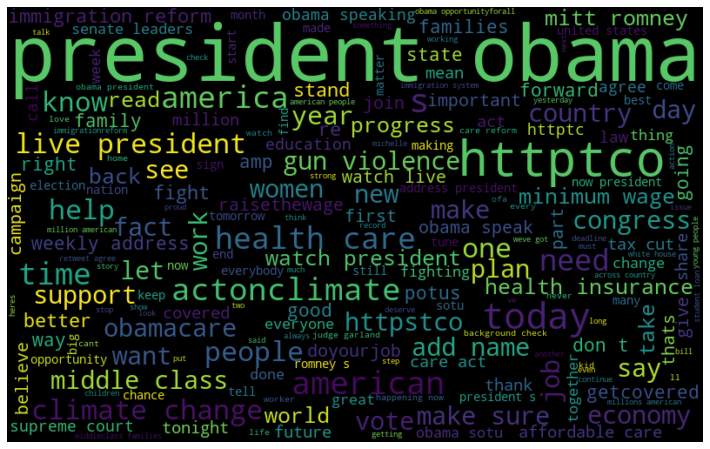

In [73]:
# WordCloud for all words
all_words = ' '.join(' '.join(l) for l in df['Tweet'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 500,random_state = 42,max_font_size = 100).generate(all_words)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

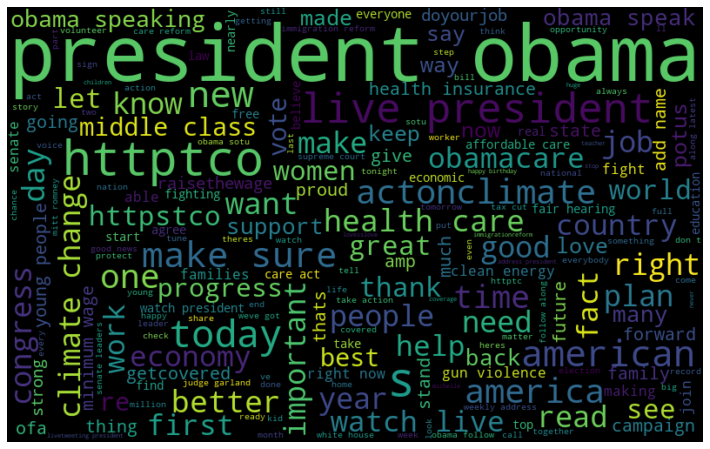

In [74]:
# WordCloud for all positive words
all_positive_words = ' '.join(' '.join(l) for l in df_positive['Tweet'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 500,random_state = 42,max_font_size = 100).generate(all_positive_words)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

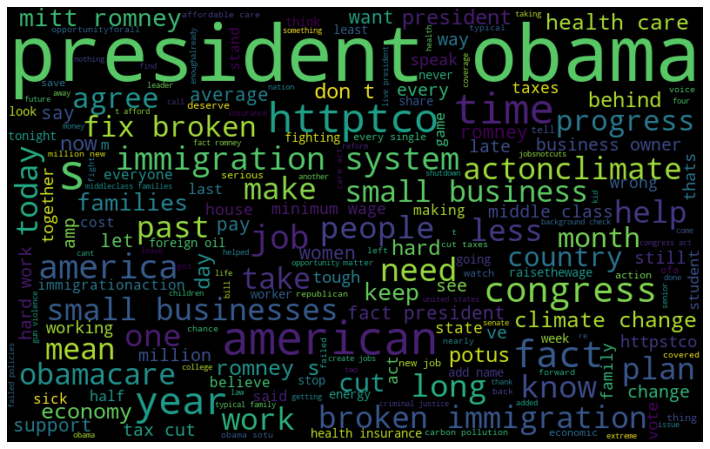

In [75]:
# WordCloud for all negative words
all_negative_words = ' '.join(' '.join(l) for l in df_negative['Tweet'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 500,random_state = 42,max_font_size = 100).generate(all_negative_words)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

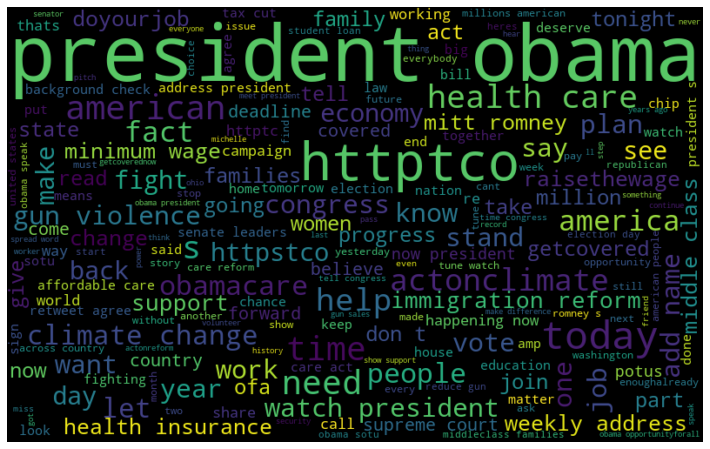

In [76]:
# WordCloud for all neutral words
all_neutral_words = ' '.join(' '.join(l) for l in df_neutral['Tweet'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 500,random_state = 42,max_font_size = 100).generate(all_neutral_words)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

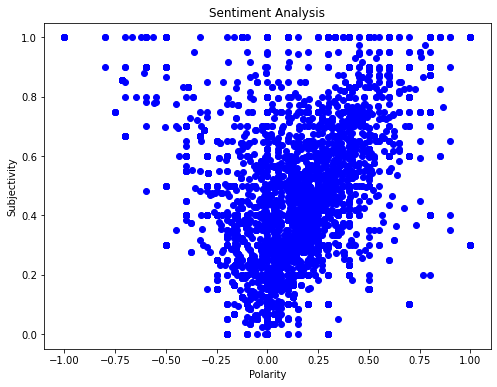

In [77]:
# graph representing polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [78]:
# Total percentage of sentiment in polarity
print("Positive tweets",round((df_positive.shape[0]/df.shape[0])*100,1),"%")

print("Negative tweets",round((df_negative.shape[0]/df.shape[0])*100,1),"%")

print("Neutral tweets",round((df_neutral.shape[0]/df.shape[0])*100,1),"%")

Positive tweets 42.6 %
Negative tweets 10.4 %
Neutral tweets 46.9 %


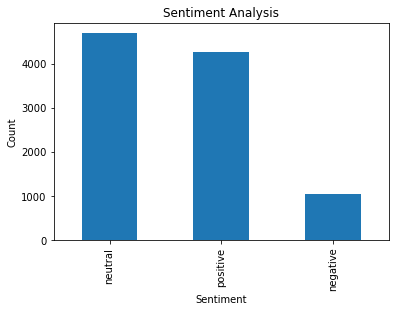

In [79]:
# Graph for all three sentiments 
df['Analysis'].value_counts()


plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()